In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Task 2.1

In [2]:
# Gradient decent function
def gradient_decent(X,y,parameters,lr,itr):
    loss_values = np.zeros(itr)
    for i in range(itr):
        fx= X @ parameters
        y_pred =1/(1+np.exp(-fx))
        err = y_pred - y
        parameters=parameters-( X.T @ err)* lr *(1/len(y))
        loss=(1/len(y))*sum(-y*np.log(y_pred)-(1-y)*np.log(1-y_pred))
        loss_values[i]=loss
    return parameters,loss_values,y_pred

In [3]:
def err_rate (parameters):
    weight = parameters[1:]
    intercept =parameters[0]
    x_p= (X_test @ weight)+intercept
    prob=1/(1+np.exp(-x_p))
    y=np.where(prob>=0.5,1,0)
    return(1-accuracy_score(y_test,y))

## Task 2.2

In [4]:
df = pd.read_csv('Book1.csv')
df.drop(['cylinders','displacement','acceleration','name'],axis=1,inplace=True)
df=df.replace('?',np.NaN)
df=df.dropna()
df['horsepower']=df.horsepower.astype(float).astype(int)

In [5]:
df.loc[df.mpg<23,['mpg']]=0
df.loc[df.mpg>=23,['mpg']]=1

In [6]:
df['high']=df['mpg']
df.drop('mpg',axis=1,inplace=True)

In [7]:
df.horsepower.dtype

dtype('int32')

In [8]:
df=pd.get_dummies(df,columns=['origin'])

In [81]:
df.head(10)

,horsepower,weight,year,high,origin_1,origin_2,origin_3
0,130,3504,70,0.0,1,0,0
1,165,3693,70,0.0,1,0,0
2,150,3436,70,0.0,1,0,0
3,150,3433,70,0.0,1,0,0
4,140,3449,70,0.0,1,0,0
5,198,4341,70,0.0,1,0,0
6,220,4354,70,0.0,1,0,0
7,215,4312,70,0.0,1,0,0
8,225,4425,70,0.0,1,0,0
9,190,3850,70,0.0,1,0,0


## Task 2.3

In [9]:
x=df.drop('high',axis=1)
y = df['high']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=616)

In [10]:
scale = StandardScaler()
m=scale.fit(X_train)
X_train=scale.transform(X_train)
X_test = scale.transform(X_test)

In [11]:
X=np.c_[np.ones((len(X_train),1)),X_train]

## Task 2.4

In [12]:
parameters = (np.random.randint(-7,7,len(x.columns)+1))/10
parameters

array([ 0. ,  0.1, -0.7, -0.6,  0.5,  0.3, -0.4])

In [13]:
lr = [0.001,0.01,0.03,0.06,0.09,0.1]
itr =np.arange(10,210,10)
itr

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

In [14]:
er_r=np.zeros((len(lr),len(itr)))
er_r1=np.zeros((len(lr),len(itr)))
for i in range(len(lr)):
    for j in range(len(itr)):
        parameters,loss_values,y_pred=gradient_decent(X,y_train,parameters,lr[i],itr[j])
        y_pred=np.where(y_pred>=0.5,1,0)
        er_r[i][j]=1-accuracy_score(y_train,y_pred)
        er_r1[i][j]= err_rate (parameters)

In [15]:
df1=pd.DataFrame(er_r,index=lr,columns=itr)
df2=pd.DataFrame(er_r1,index=lr,columns=itr)

In [16]:
index=df1.index
index.name='Learning_Rate'
columns=df1.columns
columns.name = 'Iteration'
df1.style.set_caption("Training_data_error_rate   ")

Iteration,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200
Learning_Rate,,,,,,,,,,,,,,,,,,,,
0.001,0.532847,0.521898,0.507299,0.481752,0.456204,0.434307,0.412409,0.386861,0.383212,0.372263,0.350365,0.299270,0.266423,0.211679,0.182482,0.171533,0.160584,0.149635,0.145985,0.135036
0.01,0.135036,0.142336,0.135036,0.131387,0.131387,0.120438,0.109489,0.113139,0.105839,0.105839,0.098540,0.098540,0.094891,0.087591,0.087591,0.080292,0.080292,0.080292,0.080292,0.080292
0.03,0.080292,0.080292,0.080292,0.080292,0.083942,0.083942,0.083942,0.083942,0.083942,0.087591,0.087591,0.087591,0.087591,0.087591,0.087591,0.087591,0.087591,0.087591,0.087591,0.087591
0.06,0.087591,0.087591,0.087591,0.087591,0.087591,0.087591,0.087591,0.087591,0.087591,0.087591,0.087591,0.087591,0.087591,0.091241,0.091241,0.091241,0.091241,0.091241,0.091241,0.091241
0.09,0.091241,0.091241,0.091241,0.091241,0.091241,0.091241,0.091241,0.091241,0.091241,0.091241,0.091241,0.091241,0.091241,0.091241,0.091241,0.094891,0.098540,0.098540,0.098540,0.098540
0.1,0.098540,0.098540,0.098540,0.098540,0.098540,0.098540,0.098540,0.098540,0.098540,0.098540,0.098540,0.098540,0.098540,0.098540,0.098540,0.098540,0.098540,0.098540,0.098540,0.098540


In [17]:
index=df2.index
index.name='Learning_Rate'
columns=df2.columns
columns.name = 'Iteration'
df2.style.set_caption("Testing_data_error_rate   ")

Iteration,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200
Learning_Rate,,,,,,,,,,,,,,,,,,,,
0.001,0.491525,0.483051,0.483051,0.474576,0.449153,0.440678,0.406780,0.381356,0.347458,0.330508,0.330508,0.313559,0.296610,0.271186,0.262712,0.228814,0.203390,0.144068,0.135593,0.127119
0.01,0.118644,0.101695,0.101695,0.084746,0.101695,0.101695,0.093220,0.093220,0.076271,0.076271,0.076271,0.076271,0.076271,0.076271,0.076271,0.076271,0.076271,0.067797,0.067797,0.067797
0.03,0.067797,0.067797,0.067797,0.067797,0.067797,0.059322,0.059322,0.059322,0.059322,0.059322,0.059322,0.059322,0.059322,0.059322,0.059322,0.050847,0.050847,0.050847,0.042373,0.042373
0.06,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373
0.09,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373
0.1,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373,0.042373


[Text(0.5, 1.0, 'Training_data')]

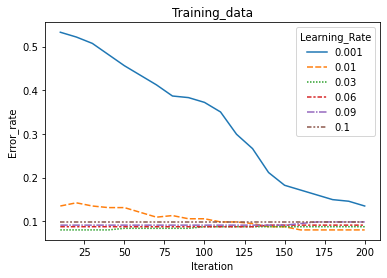

In [28]:
pt=sns.lineplot(data=df1.T)
pt.set_ylabel('Error_rate')
pt.set(title='Training_data')

[Text(0.5, 1.0, 'Test_data')]

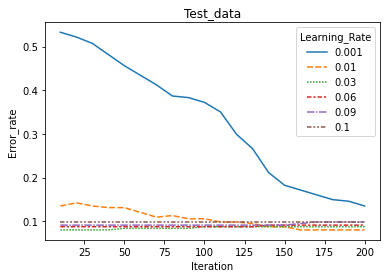

In [19]:
pt=sns.lineplot(data=df2.T)
pt.set_ylabel('Error_rate')
pt.set(title='Test_data')

## Task 2.5

In [20]:
parameters = (np.random.randint(-7,7,len(x.columns)+1))/10
parameters1 = np.copy(parameters)

In [21]:
itr=10
val=0
loss_rate=1
while loss_rate>0.01:
    parameters=np.copy(parameters1)
    parameters,loss_values,y_pred=gradient_decent(X,y_train,parameters,0.03,itr)
    loss_rate=((loss_values[val]-loss_values[-1])/loss_values[val])
    itr+=1
    val+=1

In [22]:
loss_rate

0.00996733134639023

In [23]:
parameters

array([-0.10824657, -0.35291689, -1.33820344,  0.37325455, -0.5022587 ,
       -0.0982245 ,  0.21354944])

In [24]:
itr

222

## Task 2.6

In [25]:
lr = 0.03
itr = 200

In [26]:
err = np.zeros((100))
for i in range(100):
    parameters = (np.random.randint(-7,7,len(x.columns)+1))/10
    parameters,loss_values,y_pred=gradient_decent(X,y_train,parameters,lr,itr)
    err[i]=err_rate (parameters)

<AxesSubplot:>

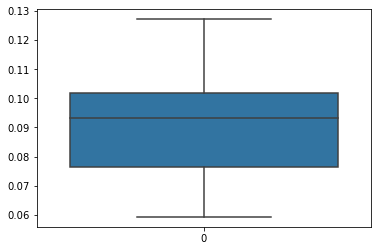

In [27]:
sns.boxplot(data=err)

## Task 2.7

In [53]:
train_itr=np.zeros((4))
para_itr = np.zeros((4,len(x.columns)+1))
iteration=np.zeros((4))
for i in range(4):
    parameters = (np.random.randint(-7,7,len(x.columns)+1))/10
    parameters1 = np.copy(parameters)
    itr=10
    val=0
    loss_rate=1
    while loss_rate>0.01:
        parameters=np.copy(parameters1)
        parameters,loss_values,y_pred=gradient_decent(X,y_train,parameters,0.03,itr)
        loss_rate=((loss_values[val]-loss_values[-1])/loss_values[val])
        itr+=1
        val+=1
    train_itr[i]=loss_rate
    para_itr[i,:]=parameters
    iteration[i]=itr

In [54]:
train_itr

array([0.00995036, 0.00997597, 0.00999066, 0.00994044])

In [55]:
para_itr

array([[-0.00260411, -1.2829321 , -0.16588148,  0.54192989, -0.86382625,
        -0.21224898,  0.33941537],
       [ 0.16492371, -0.42939009, -1.13840338,  0.34092044, -0.16236503,
         0.40243753,  0.53514761],
       [-0.17998515, -1.11181333, -0.40963069,  0.67014184, -0.4738165 ,
         0.34054861,  0.32087074],
       [ 0.2398457 , -0.70467515, -0.70693758,  0.40280951, -0.59460419,
        -0.07652166,  0.51076239]])

In [56]:
iteration

array([188., 206., 201., 235.])

**Prediction rule based on best training objective** 

In [70]:
index=np.where(train_itr==min(train_itr))

In [77]:
Best_Bias = para_itr[index][0][0]
Best_weight=para_itr[index][0][1:]
best_iteration=iteration[index]

In [78]:
Best_Bias

0.23984569669936087

In [79]:
Best_weight

array([-0.70467515, -0.70693758,  0.40280951, -0.59460419, -0.07652166,
        0.51076239])

In [80]:
best_iteration

array([235.])